# Dataset plots

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ast

okabe_ito_colors = [
    "#000000",  # Black
    "#E69F00",  # Orange
    "#56B4E9",  # Sky Blue
    "#009E73",  # Bluish Green
    "#F0E442",  # Yellow
    "#0072B2",  # Blue
    "#D55E00",  # Vermilion
    "#CC79A7",  # Reddish Purple
]

plt.rcParams['axes.prop_cycle'] = plt.cycler(color=okabe_ito_colors)

def plot_mean_with_std(csv_path, x_column, y_column, ax=None, label=None):
    # Read CSV
    df = pd.read_csv(csv_path)

    # Parse y_column entries as lists of floats
    df[y_column] = df[y_column].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

    # Compute mean and std for each row's list
    means = df[y_column].apply(np.mean)
    stds = df[y_column].apply(np.std)
    
    # Get time values from x_column
    x = df[x_column]

    # Plot
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 5))
    color = next(ax._get_lines.prop_cycler)['color']
    plt.plot(x, means, label=label, color=color)
    plt.fill_between(x, means - stds, means + stds, color=color, alpha=0.3)
    return ax


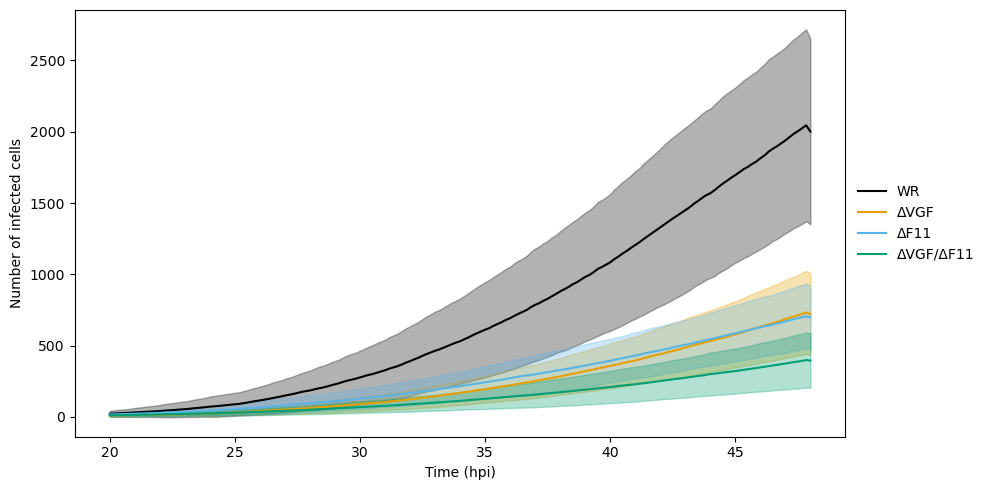

In [9]:
fig, ax = plt.subplots(figsize=(10, 5))

plot_mean_with_std("/Users/ashkanhzdr/workspace/infectio-mesa/examples/vacv-epithelial/reference_metrics_for_M061M084M089_WR_handpicked.csv", x_column="t", y_column="inf-count-list", ax=ax, label="WR")
plot_mean_with_std("/Users/ashkanhzdr/workspace/infectio-mesa/examples/vacv-epithelial/reference_metrics_for_M061M084M089_dVGF_handpicked.csv", x_column="t", y_column="inf-count-list", ax=ax, label="ΔVGF")
plot_mean_with_std("/Users/ashkanhzdr/workspace/infectio-mesa/examples/vacv-epithelial/reference_metrics_for_M061M084M089_dF11_handpicked.csv", x_column="t", y_column="inf-count-list", ax=ax, label="ΔF11")
plot_mean_with_std("/Users/ashkanhzdr/workspace/infectio-mesa/examples/vacv-epithelial/reference_metrics_for_M061M084M089_dVGFdF11_handpicked.csv", x_column="t", y_column="inf-count-list", ax=ax, label="ΔVGF/ΔF11")

# Style
ax.set_xlabel("Time (hpi)")
ax.set_ylabel("Number of infected cells")
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), frameon=False)
ax.grid(False)

plt.tight_layout()
plt.savefig("../output/dataset-infcount.svg", format="svg", bbox_inches="tight")
plt.show()


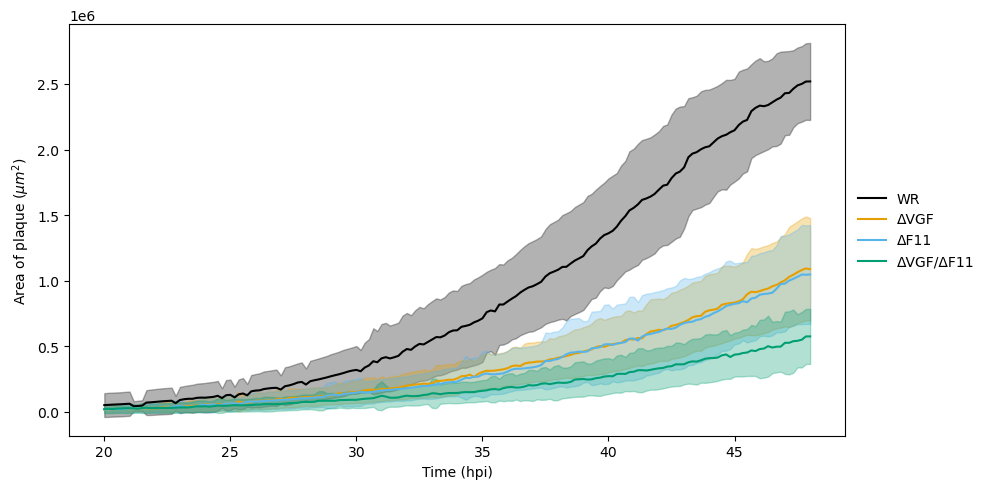

In [10]:
fig, ax = plt.subplots(figsize=(10, 5))

plot_mean_with_std("/Users/ashkanhzdr/workspace/infectio-mesa/examples/vacv-epithelial/reference_metrics_for_M061M084M089_WR_handpicked.csv", x_column="t", y_column="area-list(um2)", ax=ax, label="WR")
plot_mean_with_std("/Users/ashkanhzdr/workspace/infectio-mesa/examples/vacv-epithelial/reference_metrics_for_M061M084M089_dVGF_handpicked.csv", x_column="t", y_column="area-list(um2)", ax=ax, label="ΔVGF")
plot_mean_with_std("/Users/ashkanhzdr/workspace/infectio-mesa/examples/vacv-epithelial/reference_metrics_for_M061M084M089_dF11_handpicked.csv", x_column="t", y_column="area-list(um2)", ax=ax, label="ΔF11")
plot_mean_with_std("/Users/ashkanhzdr/workspace/infectio-mesa/examples/vacv-epithelial/reference_metrics_for_M061M084M089_dVGFdF11_handpicked.csv", x_column="t", y_column="area-list(um2)", ax=ax, label="ΔVGF/ΔF11")

# Style
ax.set_xlabel("Time (hpi)")
ax.set_ylabel(r"Area of plaque ($\mu m^2$)")
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), frameon=False)
ax.grid(False)

plt.tight_layout()
plt.savefig("../output/dataset-area.svg", format="svg", bbox_inches="tight")
plt.show()


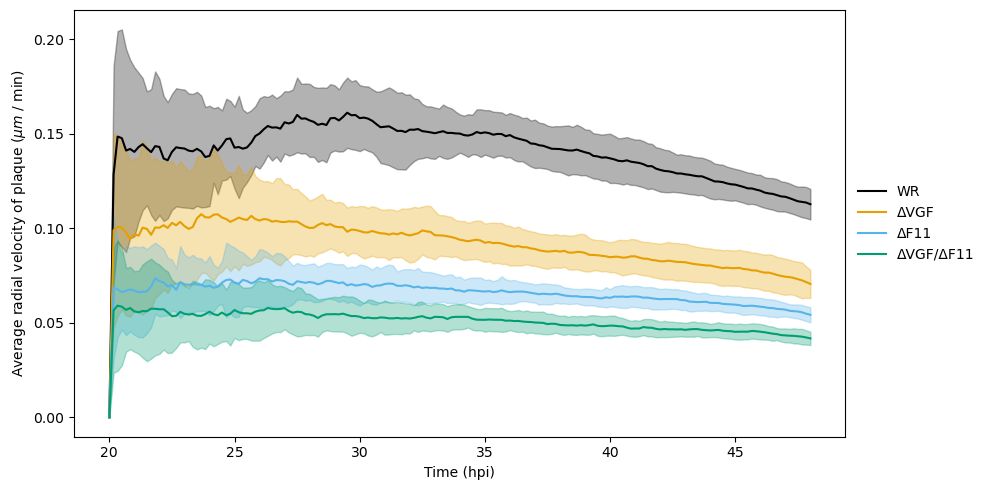

In [14]:
fig, ax = plt.subplots(figsize=(10, 5))

plot_mean_with_std("/Users/ashkanhzdr/workspace/infectio-mesa/examples/vacv-epithelial/reference_metrics_for_M061M084M089_WR_handpicked.csv", x_column="t", y_column="radial-velocity-list(um/min)", ax=ax, label="WR")
plot_mean_with_std("/Users/ashkanhzdr/workspace/infectio-mesa/examples/vacv-epithelial/reference_metrics_for_M061M084M089_dVGF_handpicked.csv", x_column="t", y_column="radial-velocity-list(um/min)", ax=ax, label="ΔVGF")
plot_mean_with_std("/Users/ashkanhzdr/workspace/infectio-mesa/examples/vacv-epithelial/reference_metrics_for_M061M084M089_dF11_handpicked.csv", x_column="t", y_column="radial-velocity-list(um/min)", ax=ax, label="ΔF11")
plot_mean_with_std("/Users/ashkanhzdr/workspace/infectio-mesa/examples/vacv-epithelial/reference_metrics_for_M061M084M089_dVGFdF11_handpicked.csv", x_column="t", y_column="radial-velocity-list(um/min)", ax=ax, label="ΔVGF/ΔF11")

# Style
ax.set_xlabel("Time (hpi)")
ax.set_ylabel(r"Average radial velocity of plaque ($\mu m$ / min)")
# ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), frameon=False, ncol=4)
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), frameon=False)
ax.grid(False)

plt.tight_layout()
plt.savefig("../output/dataset-radial-velocity-right-legend.svg", format="svg", bbox_inches="tight")
plt.show()


# Sim vs Obs (pop vs. pop)